## Teste e escolha de Modelo

Após fazer uma exploração dos dados, vi que posssui um certo padrão de comportamento, onde após uma queda possuia uma grande subida acompanhada de um momento de pequenas variações e depois uma descida e o ciclo se repetia. Então isso demonstra um forte indício para usar modelos que possuem essa dinâmica Temporal.

Com isso é interessante o uso de modelos de **Rede Neural Recorrente** como o **LSTM**, uma vez que lidam bem com séries temporais e sequências. Além do mais outro modelo interessante é o **ARIMA**, que pode ser uam boa opção para capturar padrões lineares e sazonais e por pultimo quem sabe utilizar a biblioteca **Prophet** que apresentar um bom desempenho na modelagem desses componentes de séries temporais.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/BTC-USD.csv', parse_dates=['Date'], index_col='Date')

In [3]:
# Selecionar a coluna de fechamento
closeData = df[['Close']].values

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closeData)

In [4]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Definir o comprimento da sequência
seq_length = 60

# Criar sequências
X, y = create_sequences(scaled_data, seq_length)

In [5]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Inteli\OneDrive\Documentos\GitHub\Ponderada9pts\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Calculando as métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raiz quadrada do erro quadrático médio
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Absolute Error (MAE): 0.023788146499076863
Mean Squared Error (MSE): 0.00101688893082129
Root Mean Squared Error (RMSE): 0.03188869597241772
R² Score: 0.96623592458519


NameError: name 'n_dias' is not defined

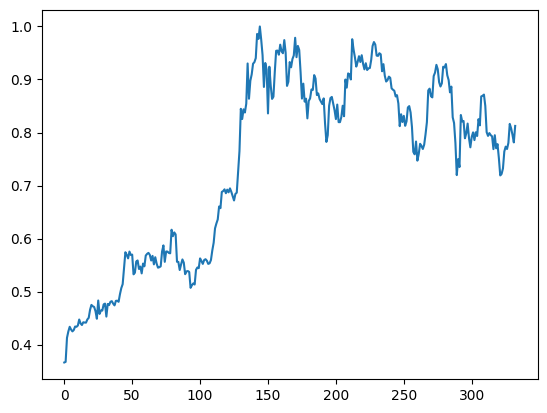

In [15]:
# Assumindo que y_test representa os valores reais para os últimos dias
plt.plot(range(len(y_test)), y_test, label="Real")
plt.plot(range(len(y_test), len(y_test) + n_dias), previsoes, label="Previsto", color='red')

plt.xlabel("Dias")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.show()

